<a href="https://colab.research.google.com/github/kenha212/Bet/blob/main/bet_w_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from google.colab import files
import io
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
uploaded  = files.upload()
uploaded1 = files.upload()
laliga = pd.read_csv(io.BytesIO(uploaded['laliga.csv']))
epl    = pd.read_csv(io.BytesIO(uploaded1['EPL-1819.csv']))

Saving laliga.csv to laliga.csv


Saving EPL-1819.csv to EPL-1819.csv


##**Laliga**

**Random**

In [ ]:
total_laliga= []

for i in range(5000):
    bet_list =np.random.randint(0,379,size=100)
    list_betting = []
    for k in bet_list:
        choice = random.randint(1,3)
        if choice == 1 :
            choice = "H"
        elif choice == 2:
            choice =  "D"
        else:
            choice =  "A"
        if choice == laliga["FTR"].iloc[k]:
            result = 1
        else:
            result= 0
        list_betting.append(result)
    total_laliga.append(list_betting.count(1))


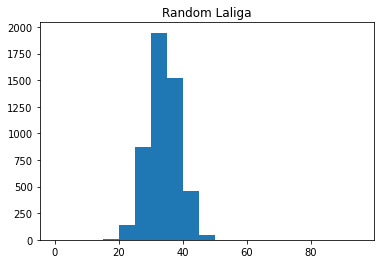

In [ ]:
a = np.arange(0,100,5)
plt.hist(total_laliga,bins=a)
plt.title("Random Laliga")
plt.show()

**Bet Follow Likely (B365)**

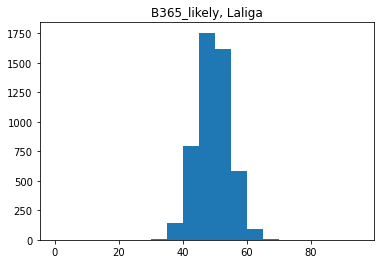

In [ ]:
B365_likely_laliga = []
for i in range(5000):
    bet_list =np.random.randint(0,379,size=100)
    list_betting = []
    for i in bet_list:
        list_betting.append(laliga["Compare_B365"].iloc[i])
    B365_likely_laliga.append(list_betting.count(1))
plt.title("B365_likely, Laliga")
plt.hist(B365_likely_laliga,bins=a)
plt.show()

**Bet Follow Likely (BW)**

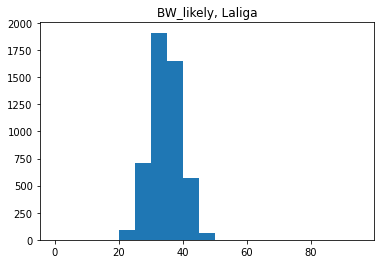

In [ ]:
BW_likely_laliga = []
for i in range(5000):
    bet_list =np.random.randint(0,379,size=100)
    list_betting = []
    for i in bet_list:
        list_betting.append(laliga["Compare_BW"].iloc[i])
    BW_likely_laliga.append(list_betting.count(1))
plt.title("BW_likely, Laliga")
plt.hist(BW_likely_laliga,bins=a)
plt.show()

##**Epl**

**Random**

In [ ]:
total_epl= []

for i in range(5000):
    bet_list =np.random.randint(0,379,size=100)
    list_betting = []
    for k in bet_list:
        choice = random.randint(1,3)
        if choice == 1 :
            choice = "H"
        elif choice == 2:
            choice =  "D"
        else:
            choice =  "A"
        if choice == epl["FTR"].iloc[k]:
            result = 1
        else:
            result= 0
        list_betting.append(result)
    total_epl.append(list_betting.count(1))

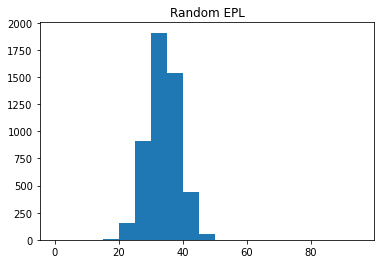

In [ ]:
a = np.arange(0,100,5)
plt.hist(total_epl,bins=a)
plt.title("Random EPL")
plt.show()

**Bet Follow B365 Likely**

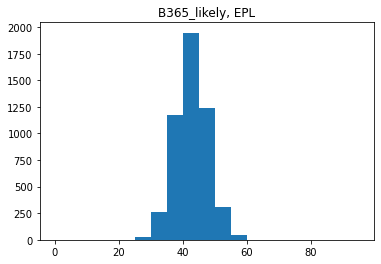

In [ ]:
B365_likely_epl = []
for i in range(5000):
    bet_list =np.random.randint(0,379,size=100)
    list_betting = []
    for i in bet_list:
        list_betting.append(epl["Compare_B365"].iloc[i])
    B365_likely_epl.append(list_betting.count(1))
plt.title("B365_likely, EPL")
plt.hist(B365_likely_epl,bins=a)
plt.show()

**Bet follow BW Likely**

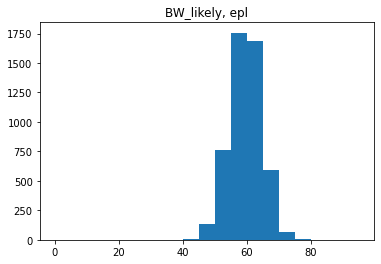

In [ ]:
BW_likely_epl = []
for i in range(5000):
    bet_list =np.random.randint(0,379,size=100)
    list_betting = []
    for i in bet_list:
        list_betting.append(epl["Compare_BW"].iloc[i])
    BW_likely_epl.append(list_betting.count(1))
plt.title("BW_likely, epl")
plt.hist(BW_likely_epl,bins=a)
plt.show()

##**Descpritive data**

In [ ]:
variable = pd.DataFrame(total_laliga)
variable1= pd.DataFrame(B365_likely_laliga)
variable2= pd.DataFrame(BW_likely_laliga)
variable3= pd.DataFrame(total_epl)
variable4= pd.DataFrame(B365_likely_epl)
variable5= pd.DataFrame(BW_likely_epl)

**Randomly bet Laliga Descriptive statistic**

In [ ]:
variable.describe()

,0
count,5000.000000
mean,33.396800
std,4.733691
min,18.000000
25%,30.000000
50%,33.000000
75%,37.000000
max,51.000000


**Bet follow Bet365 Likely Laliga**

In [ ]:
variable1.describe()

,0
count,5000.000000
mean,48.968800
std,5.078089
min,33.000000
25%,46.000000
50%,49.000000
75%,52.000000
max,65.000000


**Bet follow Betway Likely Lagliga**

In [ ]:
variable2.describe()

,0
count,5000.000000
mean,34.114200
std,4.679481
min,20.000000
25%,31.000000
50%,34.000000
75%,37.000000
max,51.000000


**Bet Randomly EPL**

In [ ]:
variable3.describe()

,0
count,5000.000000
mean,33.356600
std,4.767429
min,17.000000
25%,30.000000
50%,33.000000
75%,37.000000
max,52.000000


**Bet follow Bet365 Likely EPL**

In [ ]:
variable4.describe()

,0
count,5000.000000
mean,42.240600
std,4.979405
min,25.000000
25%,39.000000
50%,42.000000
75%,46.000000
max,61.000000


**Bet follow Betway likely EPL**

In [ ]:
variable5.describe()

,0
count,5000.000000
mean,59.021200
std,4.923941
min,42.000000
25%,56.000000
50%,59.000000
75%,62.000000
max,77.000000


##**Data analyze**

**Normality Testing**

In [ ]:
print('Betting randomly in Laliga         ',st.shapiro(total_laliga))
print('Betting following Bet365 in Laliga ',st.shapiro(B365_likely_laliga))
print('Betting following Betway in Laliga ',st.shapiro(BW_likely_laliga))
print('Betting randomly in EPL            ',st.shapiro(total_epl))
print('Betting following Bet365 in EPL    ',st.shapiro(B365_likely_epl))
print('Betting following Betway in EPL    ',st.shapiro(BW_likely_epl))




Betting randomly in Laliga          (0.9959607720375061, 1.7095520832288713e-10)
Betting following Bet365 in Laliga  (0.9963704347610474, 9.99647697952355e-10)
Betting following Betway in Laliga  (0.9953868985176086, 1.7124860557382604e-11)
Betting randomly in EPL             (0.9959905743598938, 1.9368748271908487e-10)
Betting following Bet365 in EPL     (0.9963088631629944, 7.611119512418441e-10)
Betting following Betway in EPL     (0.9962884187698364, 6.955676590258975e-10)


All of our data is non-normal because the p value of the shapiro test is $< 0.05$ 

**Between Random betting and follow a likely recommend result of a bookmaker, which is better (laliga)** 

In [ ]:
st.kruskal(total_laliga,B365_likely_laliga,BW_likely_laliga, nan_policy='omit')

KruskalResult(statistic=22605.07969308034, pvalue=0.0)

In [ ]:
variable  = pd.DataFrame(total_laliga)
variable1 = pd.DataFrame(B365_likely_laliga)
variable2 = pd.DataFrame(BW_likely_laliga)

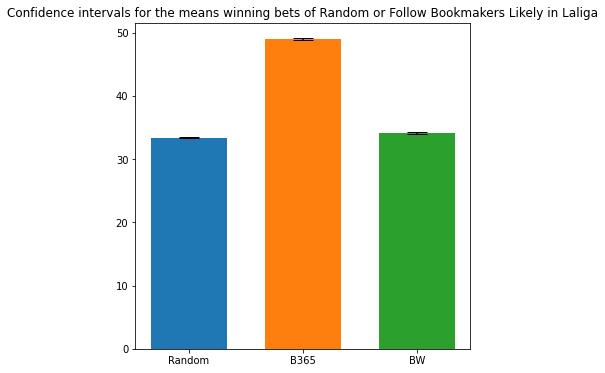

(array([33.26555941]), array([33.52804059]))
(array([33.98446239]), array([34.24393761]))


In [ ]:
ci = st.t.interval(0.95,len(variable)-1, loc=variable.mean(),scale=variable.sem())
ci1 = st.t.interval(0.95,len(variable1)-1, loc=variable1.mean(),scale=variable1.sem())
ci2 = st.t.interval(0.95,len(variable2)-1, loc=variable2.mean(),scale=variable2.sem())

plt.figure(figsize=(6,6))
plt.bar(1, variable.mean(), width = 0.1, capsize=10    , yerr = (ci[1]-ci[0])/2)
plt.bar(1.15, variable1.mean(), width = 0.1, capsize=10, yerr = (ci1[1]-ci1[0])/2)
plt.bar(1.3, variable2.mean(), width = 0.1, capsize=10 , yerr = (ci2[1]-ci2[0])/2)

plt.xticks([1,1.15,1.3],['Random','B365','BW'])
plt.title('Confidence intervals for the means winning bets of Random or Follow Bookmakers Likely in Laliga')
plt.show()
print(ci)
print(ci2)

**Between Random betting and follow a likely recommend result of a bookmaker, which is better (epl)** 

In [ ]:
st.kruskal(total_laliga,B365_likely_epl,BW_likely_epl)

KruskalResult(statistic=12016.387617596412, pvalue=0.0)

In [ ]:
variable  = pd.DataFrame(total_epl)
variable1 = pd.DataFrame(B365_likely_epl)
variable2 = pd.DataFrame(BW_likely_epl)

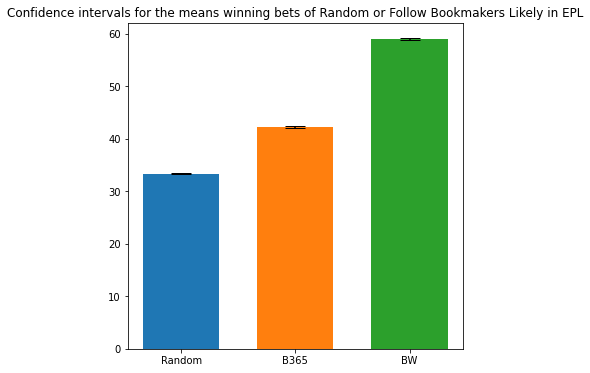

In [ ]:
ci = st.t.interval(0.95,len(variable)-1, loc=variable.mean(),scale=variable.sem())
ci1 = st.t.interval(0.95,len(variable1)-1, loc=variable1.mean(),scale=variable1.sem())
ci2 = st.t.interval(0.95,len(variable2)-1, loc=variable2.mean(),scale=variable2.sem())

plt.figure(figsize=(6,6))
plt.bar(1, variable.mean(), width = 0.1, capsize=10    ,yerr = (ci[1]-ci[0])/2)
plt.bar(1.15, variable1.mean(), width = 0.1, capsize=10,yerr = (ci1[1]-ci1[0])/2)
plt.bar(1.3, variable2.mean(), width = 0.1, capsize=10 ,yerr = (ci2[1]-ci2[0])/2)

plt.xticks([1,1.15,1.3],['Random','B365','BW'])
plt.title('Confidence intervals for the means winning bets of Random or Follow Bookmakers Likely in EPL')
plt.show()

In [ ]:
print(st.shapiro(total_epl))
print(st.shapiro(total_laliga))
print(st.shapiro(B365_likely_epl))
print(st.shapiro(B365_likely_laliga))
print(st.shapiro(BW_likely_epl))
print(st.shapiro(BW_likely_laliga))

(0.9959905743598938, 1.9368748271908487e-10)
(0.9959607720375061, 1.7095520832288713e-10)
(0.9963088631629944, 7.611119512418441e-10)
(0.9963704347610474, 9.99647697952355e-10)
(0.9962884187698364, 6.955676590258975e-10)
(0.9953868985176086, 1.7124860557382604e-11)
